## Tasks of project
- conduct an exploratory analysis of the data
- trade assortment analysis
- make and check statistical hypotheses

## Download data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# download dataset
path = ''
data = pd.read_csv(path)
display(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


None

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


## Conduct an exploratory analysis of the data
### Check NA values

In [4]:
for col in data.columns:
    print('Column:', col)
    print(data[col].isna().value_counts())
    print()

Column: date
False    6737
Name: date, dtype: int64

Column: customer_id
False    6737
Name: customer_id, dtype: int64

Column: order_id
False    6737
Name: order_id, dtype: int64

Column: product
False    6737
Name: product, dtype: int64

Column: quantity
False    6737
Name: quantity, dtype: int64

Column: price
False    6737
Name: price, dtype: int64



There are not NA values
### Check dublicates

In [5]:
data.duplicated().value_counts()

False    6737
dtype: int64

### Check count users per transaction

In [6]:
# counting the number of orders with more then one client
data.groupby('order_id').agg({'customer_id': 'nunique', 'order_id': 'count'}).query('customer_id != 1')

,customer_id,order_id
order_id,,
14872,2,9
68785,2,2
69283,2,2
69310,2,4
69345,2,2
69410,2,2
69485,3,3
69531,2,12
69833,2,2


There are a little bit transactions ordered on different clients. Delete them.

In [7]:
# delete this ones
drop_order = data.groupby('order_id').agg({'customer_id': 'nunique', 'order_id': 'count'}).query('customer_id != 1').index
data = data.query('order_id not in @drop_order')
# check
data.shape

(6648, 6)

### Change type of data

In [8]:
# change type to datetime
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H')
data['date'].head()

0   2018-10-01
1   2018-10-01
2   2018-10-01
3   2018-10-01
4   2018-10-01
Name: date, dtype: datetime64[ns]

### Check for outliers

In [9]:
# look at quantity colums
data['quantity'].describe()

count    6648.000000
mean        2.477286
std        15.330856
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1000.000000
Name: quantity, dtype: float64

Standart deviation is some big. 

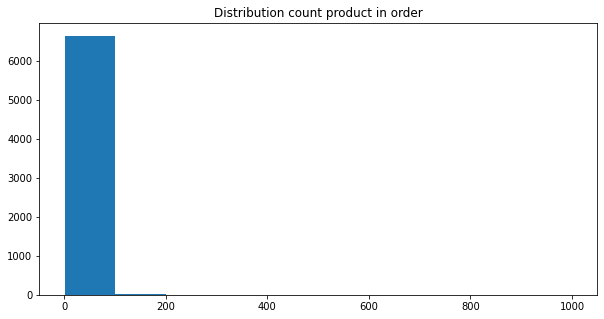

In [10]:
# hist chart
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Distribution count product in order')
ax.hist(
    'quantity',
    data = data,
    # bins=20
)
plt.show()

There are outliers with values before 1000<br>
Look at a smaller range

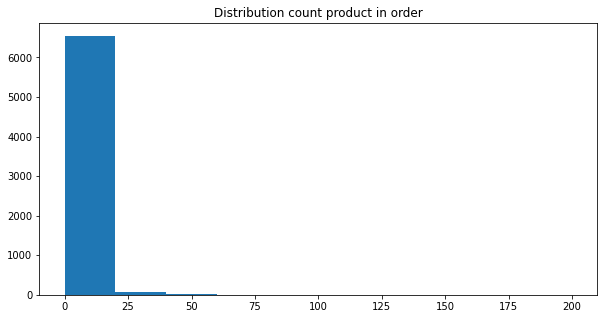

In [11]:
# hist chart before 200
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Distribution count product in order')
ax.hist(
    'quantity',
    data = data,
    range=(0,200),
    # bins=20
)
plt.show()

Choose product with quantity before 50

In [12]:
# delete product with quantity more then 50
data = data.query('quantity <= 50')

Look at a price of product

In [13]:
# describe
data['price'].describe()

count     6623.000000
mean       457.863355
std        862.946692
min          9.000000
25%        104.000000
50%        135.000000
75%        397.000000
max      14917.000000
Name: price, dtype: float64

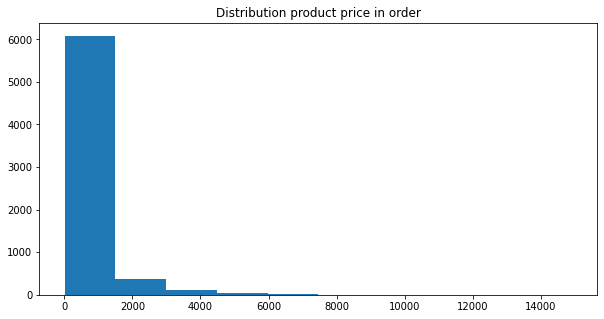

In [14]:
# hist chart
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Distribution product price in order')
ax.hist(
    'price',
    data = data,
    # bins=20
)
plt.show()

In [15]:
# choose rows with price before 8000
data = data.query('price <= 8000')

### Add column with revenue

In [16]:
# revenue column
data['revenue'] = data['quantity'] * data['price']
data.head()

,date,customer_id,order_id,product,quantity,price,revenue
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0


### Add columns with date and month

In [17]:
# new column with date
data['day'] = data['date'].astype('datetime64[D]')
data[['date', 'day']].head()

,date,day
0,2018-10-01,2018-10-01
1,2018-10-01,2018-10-01
2,2018-10-01,2018-10-01
3,2018-10-01,2018-10-01
4,2018-10-01,2018-10-01


In [18]:
# month column
data['month'] = data['date'].astype('datetime64[M]')
data['month'].unique()

array(['2018-10-01T00:00:00.000000000', '2018-11-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000',
       '2019-02-01T00:00:00.000000000', '2019-03-01T00:00:00.000000000',
       '2019-04-01T00:00:00.000000000', '2019-05-01T00:00:00.000000000',
       '2019-06-01T00:00:00.000000000', '2019-07-01T00:00:00.000000000',
       '2019-08-01T00:00:00.000000000', '2019-09-01T00:00:00.000000000',
       '2019-10-01T00:00:00.000000000'], dtype='datetime64[ns]')

## Trade assortment analysis
### Look at date range of dataset

In [19]:
# first and end date
data['day'].describe().loc[['first', 'last']]

first    2018-10-01 00:00:00
last     2019-10-31 00:00:00
Name: day, dtype: object

We have data for 13 month: from october 2018 to october 2019
### Unique count product, clients and ordes

In [20]:
# Count product
print('Unique count product: {}'.format(len(data['product'].unique())))

Unique count product: 2314


In [21]:
# count clients
print('Unique count clients: {}'.format(len(data['customer_id'].unique())))

Unique count clients: 2371


In [22]:
# count orders
print('Unique count orders: {}'.format(len(data['order_id'].unique())))

Unique count orders: 2730


### TOP-10 product by revenue and quantity

In [23]:
# set columns width
pd.set_option('display.max_colwidth', None)
# TOP-10 by revenue
top_10_product_by_sum = data.groupby('product', as_index=False)['revenue'].sum().sort_values(by='revenue', ascending=False).head(10)
top_10_product_by_sum

,product,revenue
1602,Сумка-тележка 2-х колесная Gimi Argo красная,76090.0
1603,Сумка-тележка 2-х колесная Gimi Argo синяя,65281.0
1182,Простынь вафельная 200х180 см WELLNESS RW180-01 100% хлопок,53232.0
1627,"Сумка-тележка хозяйственная Andersen Scala Shopper Plus, Lini, синяя 133-108-90",33294.0
295,Гладильная доска НИКА Гранд 122х42 см НГ,32382.0
1926,"Урна уличная ""Гео"", Hobbyka/Хоббика, 59*37,5см, сталь",24370.0
1594,Стремянки Colombo Leonardo 2 ступени G300A02W серая 3646,23992.0
278,Гладильная доска НИКА BLUES 124х46 см 5757,22840.0
1610,Сумка-тележка 2-х колесная Gimi Galaxy черная,22267.0
131,"Веник сорго с деревянной ручкой с 4-мя швами, Rozenbal, R206204",20010.0


In [24]:
# TOP-10 by quantity
top_10_product_by_quantity = data.groupby('product', as_index=False)['quantity'].sum().sort_values(by='quantity', ascending=False).head(10)
top_10_product_by_quantity

,product,quantity
829,Муляж Яблоко зеленый 9 см полиуретан,148
7,"Ёрш унитазный с деревянной ручкой , Ваир 1712012",123
769,Муляж Банан желтый 21 см полиуретан,109
2212,"Щетка-сметка 4-х рядная деревянная 300 мм (фигурная ручка) ворс 5,5 см 1801096",105
2201,Щетка для посуды *Мила* SV3182 1807009,100
2214,"Щетка-утюжок с ручкой Миди, Standart, York, G1126",100
2000,Цветок искусственный Гвоздика пластиковая одиночная в ассортименте 50 см,96
563,Коврик хлопковый 50х80 см цвета в ассортименте 6196,95
799,Муляж Лимон желтый 9 см полиуретан,92
674,"Крючок одежный двойной усиленный алюминиевый (дюраль), 1110015",90


Some product bring a lot of money, other take more in quantity
### Dynamics of number orders, products and revenue by time

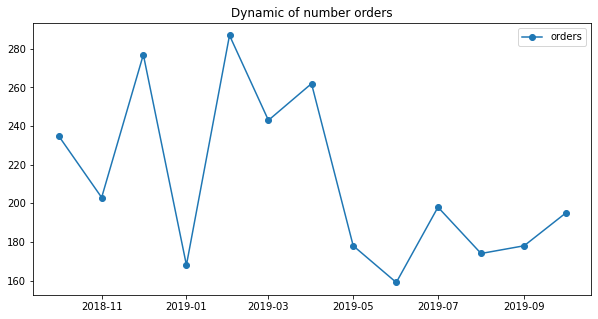

In [25]:
# dynamic of number orders
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Dynamic of number orders')
ax.plot(
    data.groupby('month')['order_id'].nunique(),
    marker='o',
    label='orders'
)
ax.legend()
plt.show()

There are a lot of orders at December and from February to April. Mayby at the end of the year it is associated with New Year's gift and in the spring with the opening of the summer season.

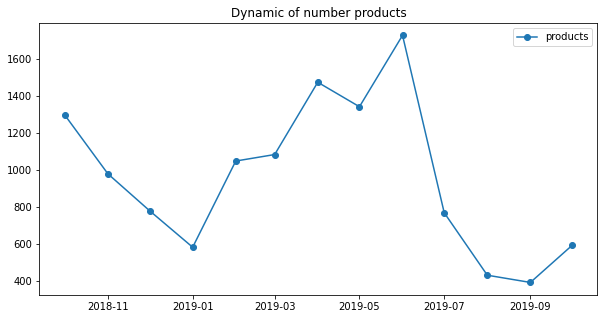

In [26]:
# dynamic of number products
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Dynamic of number products')
ax.plot(
    data.groupby('month')['quantity'].sum(),
    marker='o',
    label='products'
)
ax.legend()
plt.show()

There is also increase from February to summer

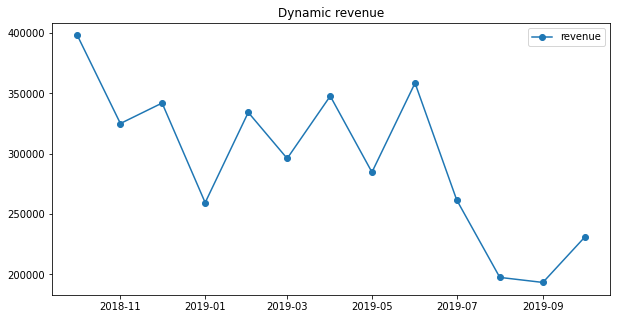

In [27]:
# dynamic revenue
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Dynamic revenue')
ax.plot(
    data.groupby('month')['revenue'].sum(),
    marker='o',
    label='revenue'
)
ax.legend()
plt.show()

Revenue is kept at about the same level from February to summer. There is recession at the end of summer. Look at average check

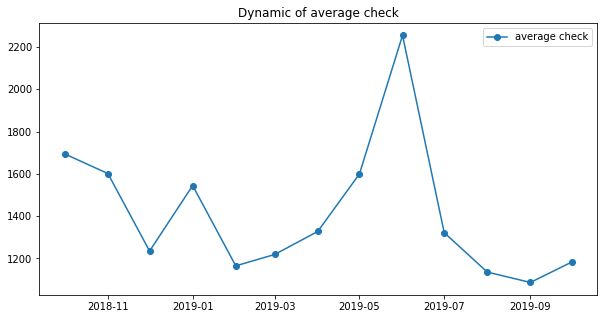

In [28]:
# average check
aov_complete = data.groupby(['month']).agg({'order_id': 'nunique', 'revenue': 'sum'})
aov_complete['aov'] = aov_complete['revenue'] / aov_complete['order_id']

# dynamic average check
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Dynamic of average check')
ax.plot(
    aov_complete['aov'],
    marker='o',
    label='average check'
)
ax.legend()
plt.show()

Average check have peak in June. Mayby it associated with preparing to season.
### Category product
Make 3 categoryes per price:
- before 1000
- between 1000 and 3000
- more then 3000

In [29]:
# функция для выявления категории товара по цене
# function to identify price category
def price_category(row):
    '''Return product categore by price:
    <= 1000 р: 1000
    > 1000 & <= 3000р.: 1000-3000
    > 3000: 3000
    '''
    if row['price'] <= 1000:
        return '1000'
    elif row['price'] > 1000 and row['price'] <= 3000:
        return '1000 - 3000'
    else:
        return '3000'

# count
data['price_category'] = data.apply(price_category, axis=1)

Look at category

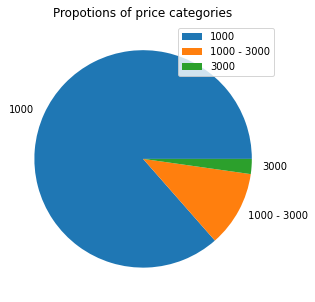

In [30]:
# pie chart
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Propotions of price categories')
ax.pie(
    data['price_category'].value_counts(normalize=True),
    labels=data['price_category'].value_counts(normalize=True).index
)
ax.legend()
plt.show()

There are a lot of product with price before 1000

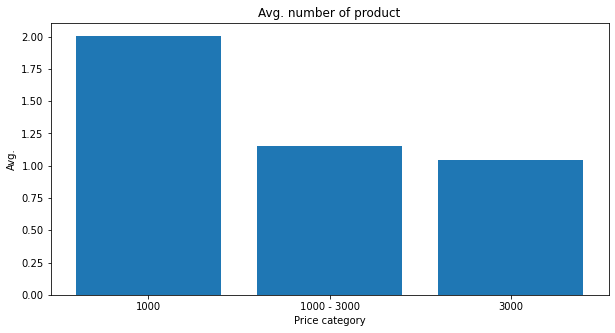

In [31]:
# chart average number of product
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Avg. number of product')
ax.bar(
    x=data.groupby('price_category').agg({'quantity': 'mean'}).index,
    height=data.groupby('price_category').agg({'quantity': 'mean'})['quantity'],
)
ax.set_xlabel('Price category')
ax.set_ylabel('Avg.')
plt.show()

Products with price from 1000 to 3000 are most often taken in a single copy

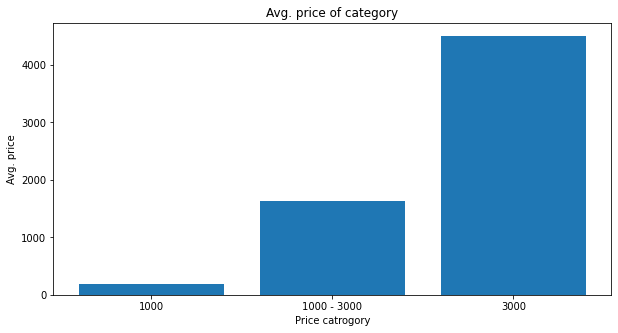

In [32]:
# chart average price
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Avg. price of category')
ax.bar(
    x=data.groupby('price_category').agg({'price': 'mean'}).index,
    height=data.groupby('price_category').agg({'price': 'mean'})['price'],
)
ax.set_xlabel('Price catrogory')
ax.set_ylabel('Avg. price')
plt.show()

"Basic" and "additional" products<br>
Devided like this:

- first list: orders with one product 
- second list: orders with more then one product
- select product from second list that are not in first list

In [33]:
# first list
order_1_product = data.groupby('order_id').agg({'product': 'nunique'}).query('product == 1').index
# second list
order_more_1_product = data.groupby('order_id').agg({'product': 'nunique'}).query('product > 1').index

# the set products in fist list
set_1_product = set(data.query('order_id in @order_1_product')['product'].unique())
set_more_1_product = set(data.query('order_id in @order_more_1_product')['product'].unique())

# find differences: product is in the second list but that are not in first
set_more_1_product = set_more_1_product.difference(set_1_product)

Create property

In [34]:
# фунция выделения товара в категорию
# function of selecting product in category
def product_category(row):
    """Return basic or additional category of product
    """
    if row['product'] in set_1_product:
        return 'basic'
    elif row['product'] in set_more_1_product:
        return 'additional'

# apply function
data['product_category'] = data.apply(product_category, axis=1)

Look at category statistics

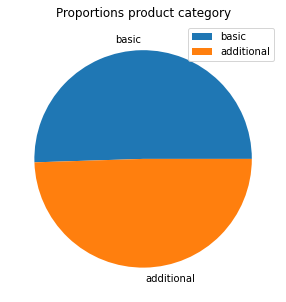

In [35]:
# круговая диаграмма категорий товаров
# pie chart
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Proportions product category')
ax.pie(
    data['product_category'].value_counts(normalize=True),
    labels=data['product_category'].value_counts(normalize=True).index
)
ax.legend()
plt.show()

Division equally

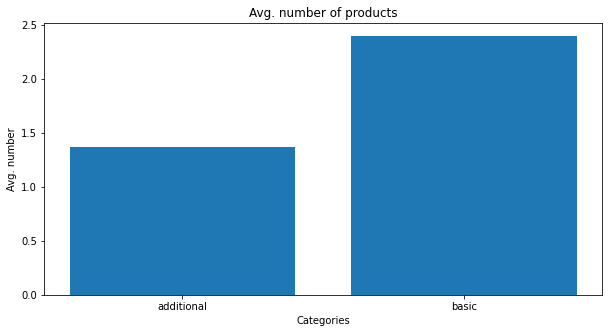

In [36]:
# chart avg. quantity
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Avg. number of products')
ax.bar(
    x=data.groupby('product_category').agg({'quantity': 'mean'}).index,
    height=data.groupby('product_category').agg({'quantity': 'mean'})['quantity'],
)
ax.set_xlabel('Categories')
ax.set_ylabel('Avg. number')
plt.show()

Basic products are taken more

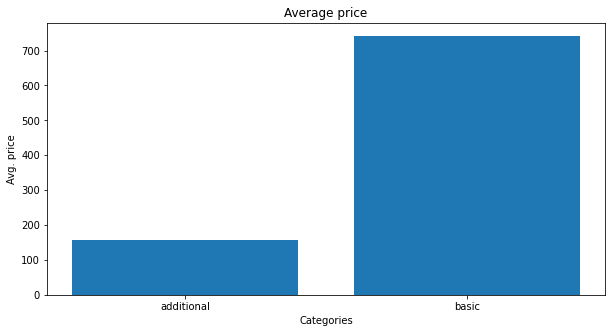

In [37]:
# chart average price
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Average price')
ax.bar(
    x=data.groupby('product_category').agg({'price': 'mean'}).index,
    height=data.groupby('product_category').agg({'price': 'mean'})['price'],
)
ax.set_xlabel('Categories')
ax.set_ylabel('Avg. price')
plt.show()

Basic product have more price then additional

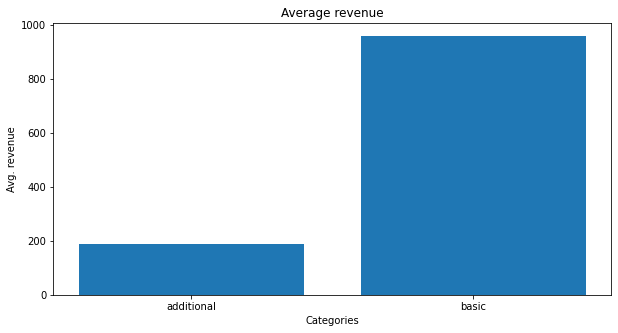

In [38]:
# chart revenue
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Average revenue')
ax.bar(
    x=data.groupby('product_category').agg({'revenue': 'mean'}).index,
    height=data.groupby('product_category').agg({'revenue': 'mean'})['revenue'],
)
ax.set_xlabel('Categories')
ax.set_ylabel('Avg. revenue')
plt.show()

Basic also have a more revenue

### Shopping frequancy

In [39]:
# average frequancy
print('Average frequancy per client: {:.3}'.format(data['order_id'].nunique() / data['customer_id'].nunique()))

Average frequancy per client: 1.15


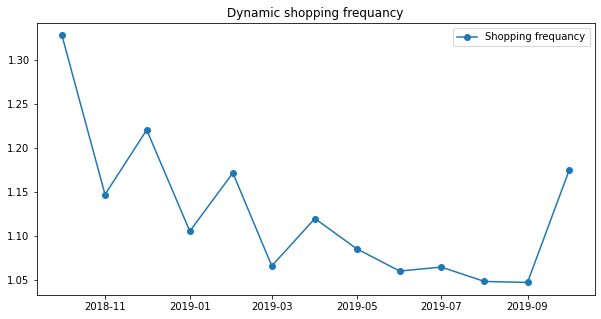

In [40]:
# dynamic shopping frequancy
avg_order_per_customer = data.groupby('month')['customer_id', 'order_id'].nunique()
avg_order_per_customer['avg'] = avg_order_per_customer['order_id'] / avg_order_per_customer['customer_id']

# chart
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Dynamic shopping frequancy')
ax.plot(
    avg_order_per_customer['avg'],
    marker='o',
    label='Shopping frequancy'
)
ax.legend()
plt.show()

The frequancy has been falling since the beginning
## Test of statistical hypotheses
<p>
There are two periods to compare: May - June and September - October. First is peak of season, second is recession
<br>
I will check with Mann–Whitney U test
</p>

### Average number of quantity product comparison

- Null hypothesis: average number of quantity per day does not differ
- Alternative hypothesis: the average differ

In [41]:
# select two periods
may_june = data.query('month >= "2019-05-01" and month <= "2019-06-30"')
september_october = data.query('month >= "2019-09-01" and month <= "2019-10-31"')

In [42]:
# critical significance level
alpha = 0.05

result = st.mannwhitneyu(may_june.groupby('order_id')['quantity'].sum().values, september_october.groupby('order_id')['quantity'].sum().values)

if (result.pvalue < alpha):
    print('pvalue:', result.pvalue)
    print('Null hypothesis was rejected: the different is statistically significant')
else:
    print('pvalue:', result.pvalue)
    print('Null hypothesis was not rejected: no difference can be drawn')

pvalue: 4.004402790754604e-14
Null hypothesis was rejected: the different is statistically significant


### Average revenue comparison
- Null hypothesis: average does not differ
- Alternative hypothesis: average differ

In [43]:
result = st.mannwhitneyu(may_june.groupby('order_id')['revenue'].sum().values, september_october.groupby('order_id')['revenue'].sum().values)

if (result.pvalue < alpha):
    print('pvalue:', result.pvalue)
    print("Null hypothesis was rejected: the different is statistically significant")
else:
    print('pvalue:', result.pvalue)
    print("Null hypothesis was not rejected: no difference can be drawn")

pvalue: 0.013393294940159284
Null hypothesis was rejected: the different is statistically significant


### Shopping frequancy per client comparison
- Null hypothesis: shopping frequancy does not differ
- Alternative hypothesis: shopping frequancy differ

In [44]:
result = st.mannwhitneyu(
    may_june.groupby('customer_id', as_index=False).agg({'order_id': 'nunique'})['order_id'].values, 
    september_october.groupby('customer_id', as_index=False).agg({'order_id': 'nunique'})['order_id'].values
    )

if (result.pvalue < alpha):
    print('pvalue:', result.pvalue)
    print("Null hypothesis was rejected: the different is statistically significant")
else:
    print('pvalue:', result.pvalue)
    print("Null hypothesis was not rejected: no difference can be drawn")

pvalue: 0.8403835951115601
Null hypothesis was not rejected: no difference can be drawn


## Result, recommendations

- Average shopping frequancy per client: 1.15. The frequancy has been falling from November 2018 to September 2019
- There are two seasons: first in December it is associated with New Year's gifts, seconde starting from February - March to end the summer it is associated with summer season
<br>It is recommended to build all marketing activities according to these two periods
- Test of statistical hypotheses show that there are statistical differenses between the seasons in terms of number of products and revenue<br>
Test of shopping frequancy per client show there are not differenses